<div style="text-align: center;">

# Project: Surface Water Impact on Groundwater in Coastal Rhode Island
## Course: CSC 593, Created by: Shahriar Bin Shahid

</div>

-----

## 1. Locations of Collected Surface and Groundwater Data
### Data Source: USGS (https://waterdata.usgs.gov/nwis)

In [1]:
import pandas as pd
import folium

# File path:
sw_csv_file_path = 'sw-location.csv'
gw_csv_file_path = 'gw-location.csv'

# Reading files:
df_sw = pd.read_csv(sw_csv_file_path)
df_gw = pd.read_csv(gw_csv_file_path)

# Creating a map centered at the average location of both datasets:
center_lat = df_sw['Latitude'].mean()
center_lon = df_sw['Longitude'].mean()
mymap = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Adding markers:
for index, row in df_sw.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=str((row['Latitude'], row['Longitude'])),
                  icon=folium.Icon(color='blue')).add_to(mymap)
for index, row in df_gw.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=str((row['Latitude'], row['Longitude'])),
                  icon=folium.Icon(color='red')).add_to(mymap)

# Adding legend:
legend_html = """
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 120px; height: 90px; 
                 border:2px solid grey; z-index:9999; font-size:12px;
                 background-color:white;
                 opacity: 0.9;
                 ">
     &nbsp; <strong>Legend</strong><br>
     &nbsp; GW Data Point &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
     &nbsp; SW Data Point &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i>
      </div>
     """
mymap.get_root().html.add_child(folium.Element(legend_html))

# Displaying the map:
mymap

## 2. Individual Groundwater and Surface Water Level Time Series Graphs

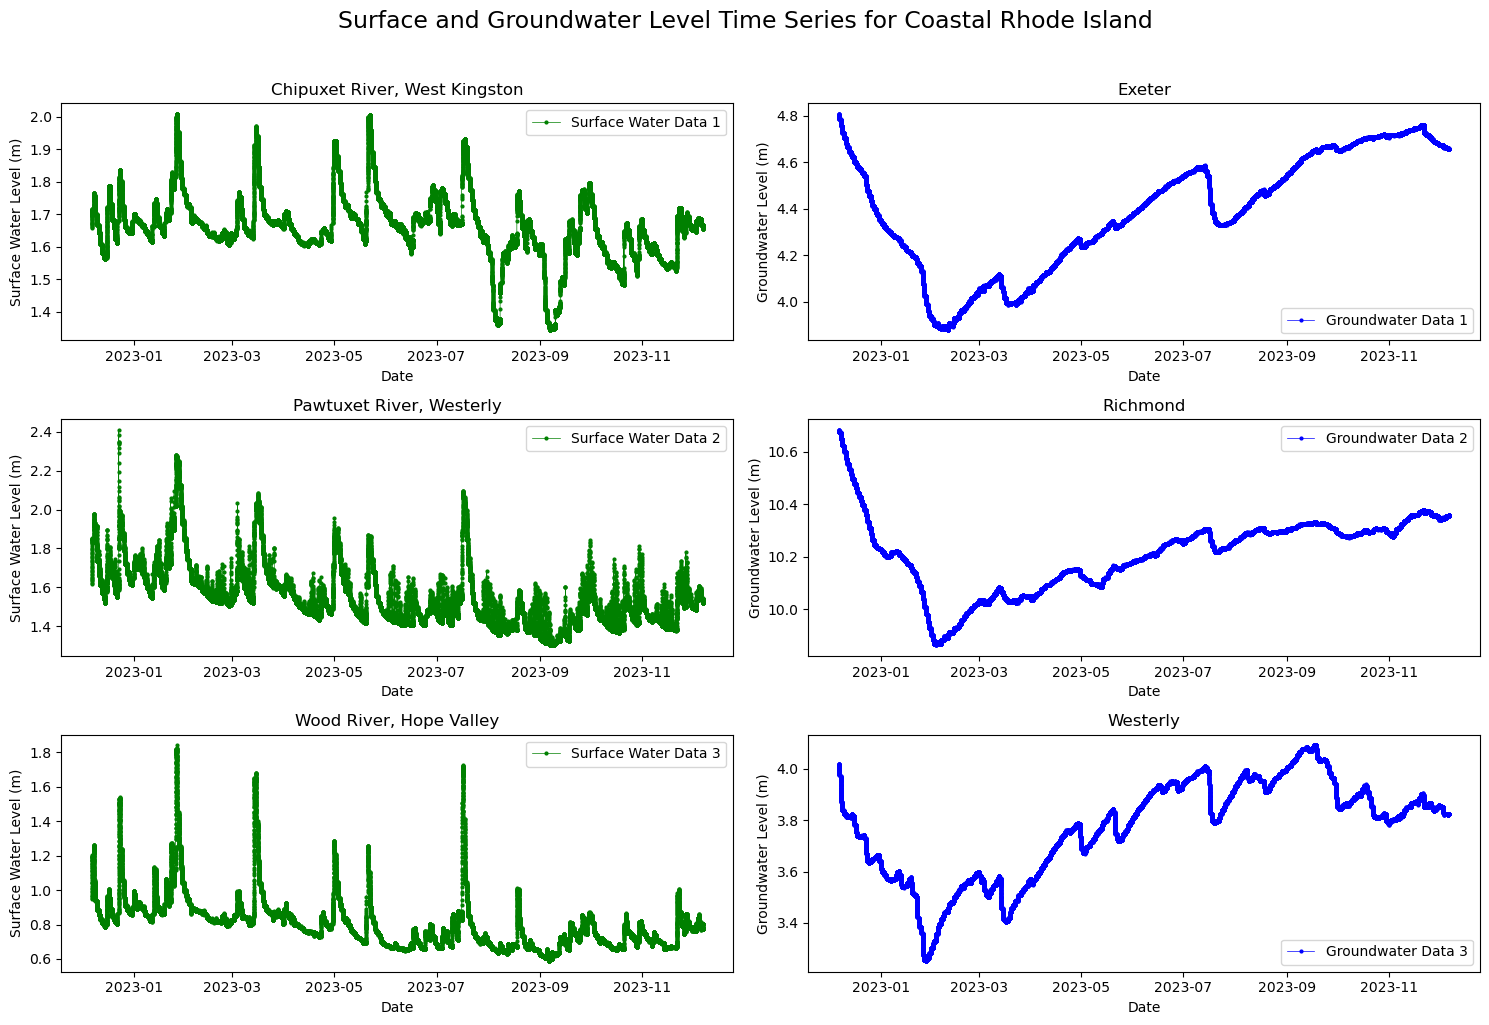

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Specifying the paths:
sw_data_info = [
    'chipuxet_river_west_kingston.csv',
    'pawtuxet_river_westerly.csv',
    'wood_river_hope_valley.csv'
]

gw_data_info = [
    'gw-exeter1.csv',
    'gw-richmond2.csv',
    'gw-westerly.csv'
]

# Specifying individual titles for each subplot:
sw_titles = ["Chipuxet River, West Kingston", "Pawtuxet River, Westerly", "Wood River, Hope Valley"]
gw_titles = ["Exeter", "Richmond", "Westerly"]

# Plotting time series for all subplots:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.suptitle('Surface and Groundwater Level Time Series for Coastal Rhode Island', y=1.02, fontsize=17)

# Plotting surface water data:
for i, (path, title) in enumerate(zip(sw_data_info, sw_titles)):
    sw_data = pd.read_csv(path)
    sw_data['Date'] = pd.to_datetime(sw_data['Date'])
    axs[i, 0].plot(sw_data['Date'], sw_data['SW Level'], label=f'Surface Water Data {i + 1}', linestyle='-', marker='o', color='green', markersize=2, linewidth=0.5)
    axs[i, 0].set_xlabel('Date')
    axs[i, 0].set_ylabel('Surface Water Level (m)')
    axs[i, 0].legend()
    axs[i, 0].set_title(title)

# Plotting groundwater data:
for i, (path, title) in enumerate(zip(gw_data_info, gw_titles)):
    gw_data = pd.read_csv(path)
    gw_data['Date'] = pd.to_datetime(gw_data['Date'])
    axs[i, 1].plot(gw_data['Date'], gw_data['GW Level'], label=f'Groundwater Data {i + 1}', linestyle='-', marker='o', color='blue', markersize=2, linewidth=0.5)
    axs[i, 1].set_xlabel('Date')
    axs[i, 1].set_ylabel('Groundwater Level (m)')
    axs[i, 1].legend()
    axs[i, 1].set_title(title)

plt.tight_layout()

# Saving the plots:
plt.savefig('water_level_plots.png', dpi=300) 
plt.show()

## 3. Average Groundwater and Surface Water Level Time Series Graphs

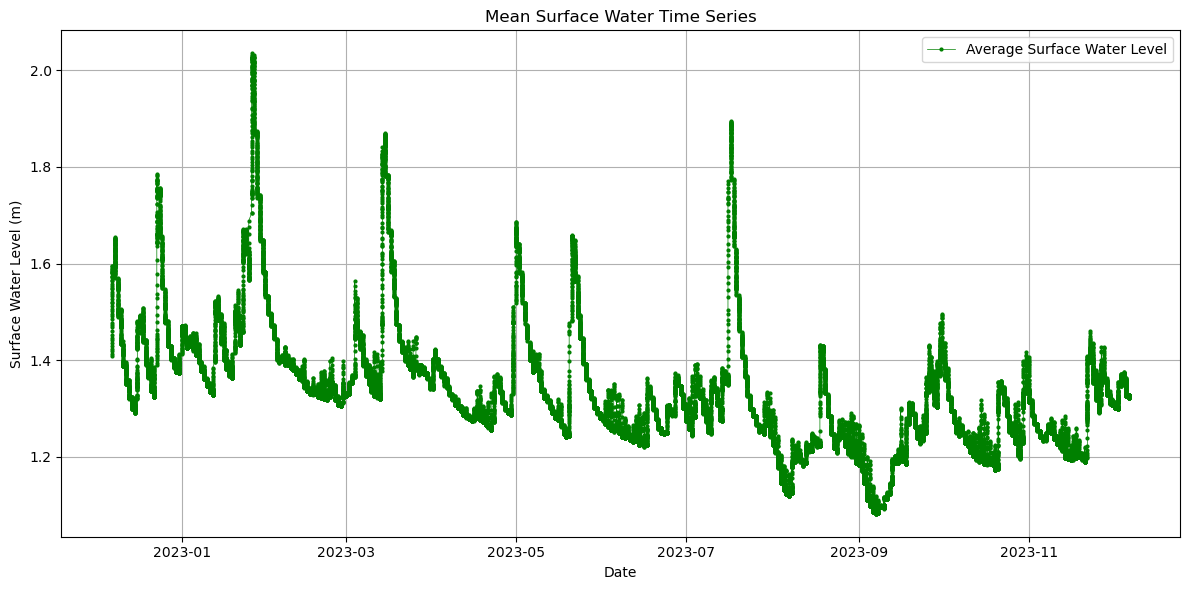

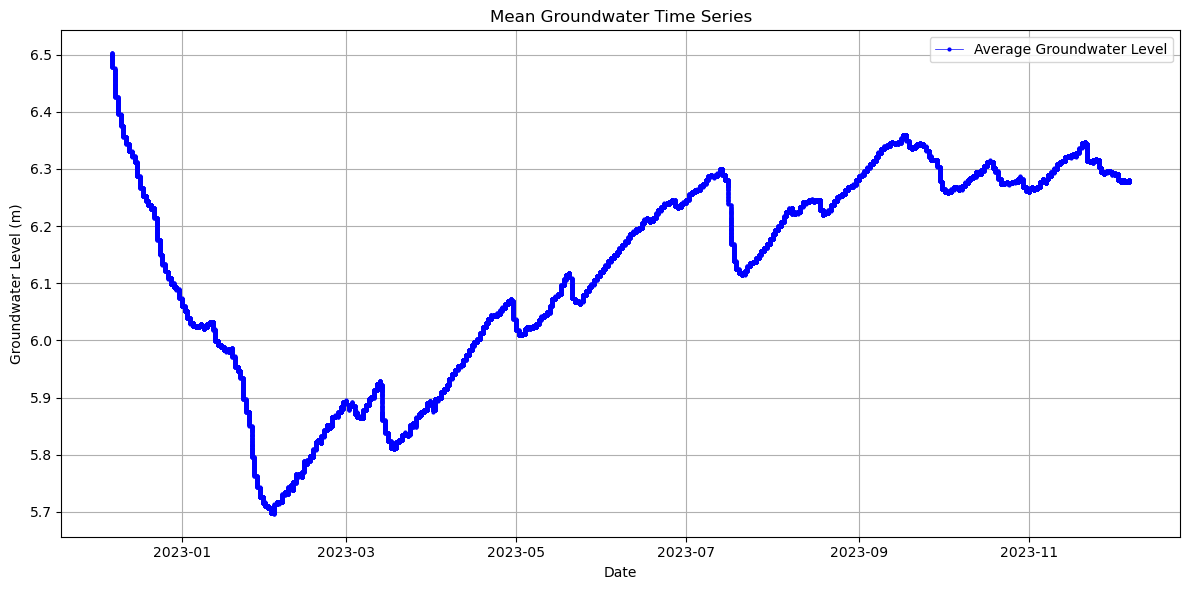

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Specifying the paths:
sw_paths = [
    'chipuxet_river_west_kingston.csv',
    'pawtuxet_river_westerly.csv',
    'wood_river_hope_valley.csv'
]

gw_paths = [
    'gw-exeter1.csv',
    'gw-richmond2.csv',
    'gw-westerly.csv'
]

# Plotting the average surface water curve:
plt.figure(figsize=(12, 6))
average_sw = pd.concat([pd.read_csv(sw_path)['SW Level'] for sw_path in sw_paths], axis=1).mean(axis=1)
average_sw = average_sw.iloc[:len(pd.read_csv(sw_paths[0])['Date'])]  # Slice to match lengths
plt.plot(pd.to_datetime(pd.read_csv(sw_paths[0])['Date']), average_sw, label='Average Surface Water Level', linestyle='-', marker='o', color='green', markersize=2, linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Surface Water Level (m)')
plt.title('Mean Surface Water Time Series')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('avg_SW_water_level_plots.png', dpi=300)
plt.show()

# Plotting the average groundwater curve:
plt.figure(figsize=(12, 6))
average_gw = pd.concat([pd.read_csv(gw_path)['GW Level'] for gw_path in gw_paths], axis=1).mean(axis=1)
average_gw = average_gw.iloc[:len(pd.read_csv(gw_paths[0])['Date'])]  
plt.plot(pd.to_datetime(pd.read_csv(gw_paths[0])['Date']), average_gw, label='Average Groundwater Level', linestyle='-', marker='o', color='blue', markersize=2, linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Groundwater Level (m)')
plt.title('Mean Groundwater Time Series')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('avg_GW_water_level_plots.png', dpi=300)
plt.show()

**Average Surface Water Level:** 
1.1 to 2 meter,
Consistent, stable, and steady water level.

**Average Groundwater Level:**
5.7 to 6.5 meter,
Declining trend: January-March,
Gradual increase: March-June,
Steady level: June-December.

# 4. Pond Location Map
### Data Source: https://dem.ri.gov/sites/g/files/xkgbur861/files/maps/mapfile/pondbath.pdf

In [5]:
import pandas as pd
import folium

# File path:
pond_csv_file_path = 'Pond-data-depth-d1.csv'

# Reading file:
df_pond = pd.read_csv(pond_csv_file_path)

# Creating a map centered at the average location of the pond dataset:
center_lat = df_pond['Latitude'].mean()
center_lon = df_pond['Longitude'].mean()
mymap = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Adding markers:
for index, row in df_pond.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=str((row['Latitude'], row['Longitude'])),
                  icon=folium.Icon(color='green')).add_to(mymap)

# Adding legend:
legend_html = """
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 120px; height: 70px; 
                 border:2px solid grey; z-index:9999; font-size:12px;
                 background-color:white;
                 opacity: 0.9;
                 ">
     &nbsp; <strong>Legend</strong><br>
     &nbsp; Pond Data Point &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i>
      </div>
     """
mymap.get_root().html.add_child(folium.Element(legend_html))

# Displaying the map:
mymap

# 5. Elevation Profile

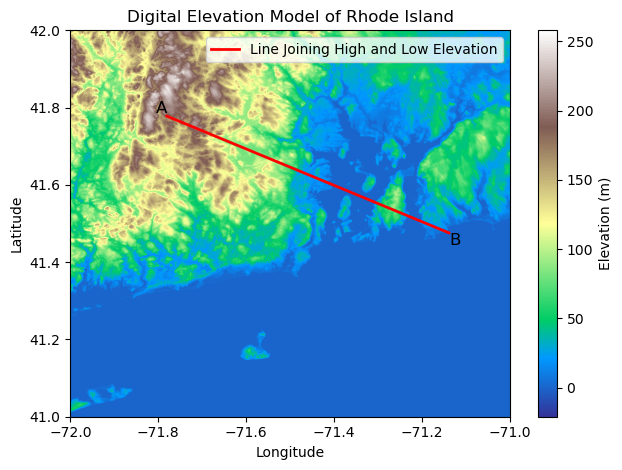

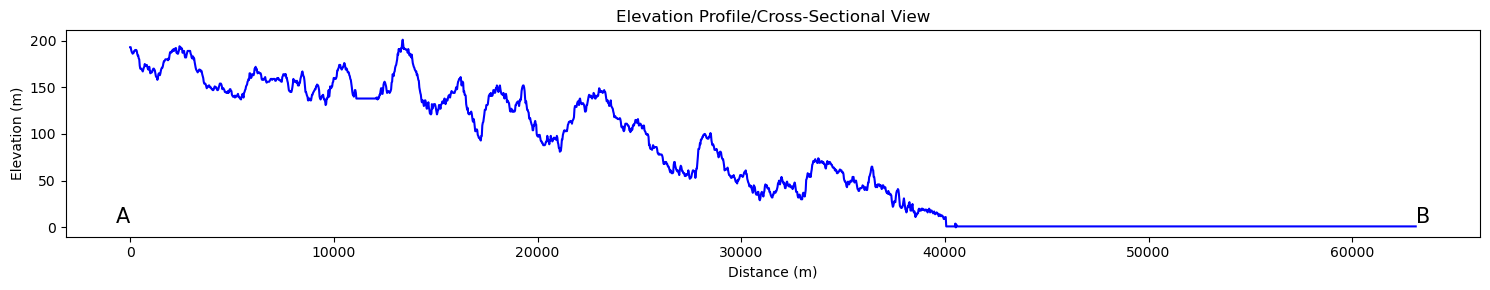

In [6]:
import rasterio
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import numpy as np
from math import radians, sin, cos, sqrt, atan2

# Function to calculate Haversine distance between two points:
def haversine(lat1, lon1, lat2, lon2):
    R = 6378  # Radius of the Earth in km:

    # Converting latitude and longitude from degrees to radians:
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula:
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    # Converting distance from km to m:
    return distance * 1000

# Specifying the path:
dem_file_path = 'n41_w072_1arc_v3.tif'

# Defining the coordinates:
start_point = (41.778113, -71.780672) 
end_point = (41.475814, -71.138960)  

# Open DEM file:
with rasterio.open(dem_file_path) as dem:
    # Converting start and end coordinates to pixel indices:
    start_col, start_row = dem.index(start_point[1], start_point[0])
    end_col, end_row = dem.index(end_point[1], end_point[0])

    # Extracting elevation values along the line:
    line_elevations = []

    # Calculating distances along the line using pixel indices:
    pixel_distance = np.sqrt((end_col - start_col)**2 + (end_row - start_row)**2)

    for t in np.linspace(0, 1, int(pixel_distance)):
        col = int(start_col + t * (end_col - start_col))
        row = int(start_row + t * (end_row - start_row))

        elevation = dem.read(1, window=((row, row + 1), (col, col + 1)))
        line_elevations.append(elevation[0, 0])

    # Flattening the elevation values:
    min_elevation = np.min(line_elevations)
    flattened_elevations = line_elevations - min_elevation

    # Calculating the real-world distance in meter:
    real_world_distance = haversine(start_point[0], start_point[1], end_point[0], end_point[1])

    # Plotting DEM:
    plt.imshow(dem.read(1), cmap='terrain', extent=[dem.bounds.left, dem.bounds.right, dem.bounds.bottom, dem.bounds.top], aspect='auto')

    # Marking the line and point A and B on the DEM:
    plt.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], color='red', linestyle='-', linewidth=2, label='Line Joining High and Low Elevation')
    plt.text(start_point[1], start_point[0], 'A', color='black', fontsize=12, ha='right', va='bottom')
    plt.text(end_point[1], end_point[0], 'B', color='black', fontsize=12, ha='left', va='top')

    # Displaying DEM:
    plt.title('Digital Elevation Model of Rhode Island')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(label='Elevation (m)')
    plt.legend()
    plt.tight_layout()
    plt.savefig('DEM.png', dpi=300)
    plt.show()

    # Displaying elevation profile:
    plt.figure(figsize=(15, 3))  
    distances_along_line = np.linspace(0, real_world_distance, len(flattened_elevations))
    plt.plot(distances_along_line, flattened_elevations, color='blue')
    plt.text(0, min(flattened_elevations), 'A', color='black', fontsize=15, ha='right', va='bottom')
    plt.text(real_world_distance, min(flattened_elevations), 'B', color='black', fontsize=15, ha='left', va='bottom')
    plt.xlabel('Distance (m)')
    plt.ylabel('Elevation (m)')
    plt.title('Elevation Profile/Cross-Sectional View')
    plt.tight_layout()  
    plt.savefig('Elevation_profile.png', dpi=300)
    plt.show()

## 6. Plotting Pond Depth on DEM

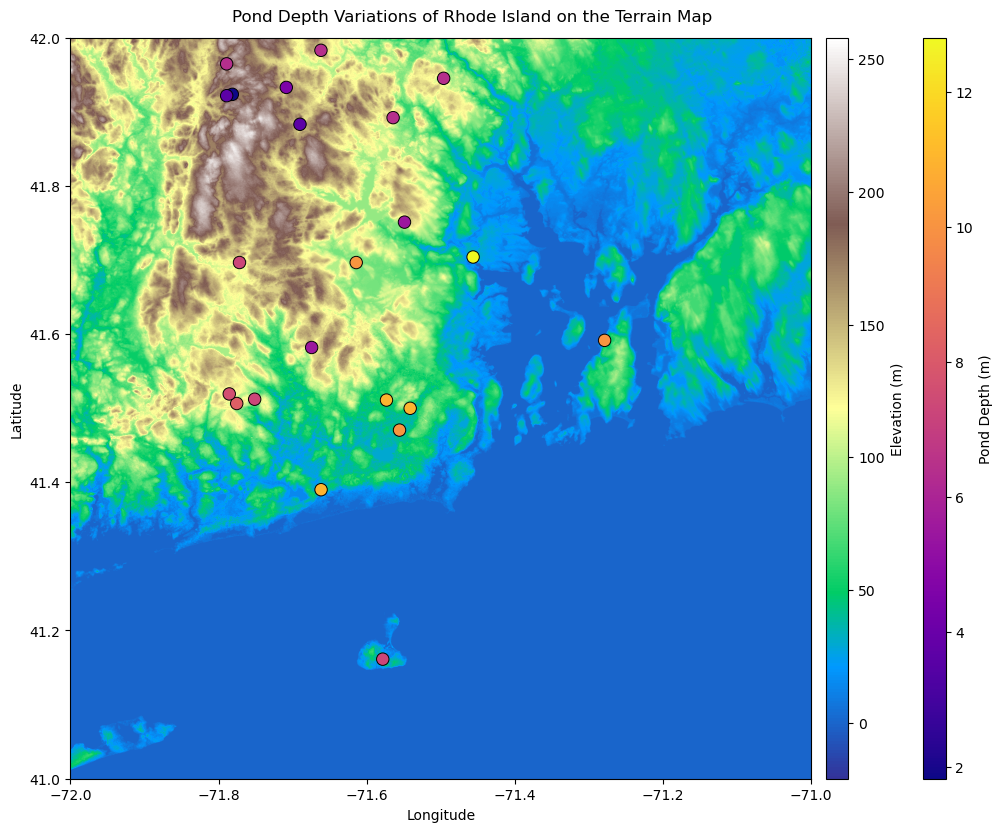

In [7]:
import rasterio
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

# Reading DEM:
with rasterio.open(dem_file_path) as dem:
    dem_array = dem.read(1)

# Reading the CSV file for pond depths:
pond_data = pd.read_csv('Pond-data-depth-d1.csv')
pond_coordinates = list(zip(pond_data['Latitude'], pond_data['Longitude']))
pond_depths = pond_data['Maximum Depth (m)']

# Creating subplots with shared y-axis:
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the DEM:
im = ax.imshow(dem_array, cmap='terrain', extent=[dem.bounds.left, dem.bounds.right, dem.bounds.bottom, dem.bounds.top], origin='upper')

# Scatter plot of pond locations with different colors for depths:
sc = ax.scatter(pond_data['Longitude'], pond_data['Latitude'], c=pond_depths, cmap='plasma', s=80, edgecolor='k', linewidth=0.7)

# Additional axis for the color bars:
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="3%", pad=0.15)
cax1 = divider.append_axes("right", size="3%", pad=0.75)

# Color bars for DEM and pond depth:
cbar0 = plt.colorbar(im, cax=cax0, label='Elevation (m)')
cbar1 = plt.colorbar(sc, cax=cax1, label='Pond Depth (m)')

# Output:
plt.tight_layout()
plt.suptitle('Pond Depth Variations of Rhode Island on the Terrain Map', x=0.47, y=1.01, fontsize=12)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig('Pond_depth_vs_elevation.png', dpi=300, bbox_inches='tight')
plt.show()

**Visualization:** Deep ponds are situated along the coast, while shallower ponds are predominantly found inland.

## 7. Scatter Plot of Maximum Pond Depth vs Surface Elevation

Correlation Coefficient: -0.8623025588671833


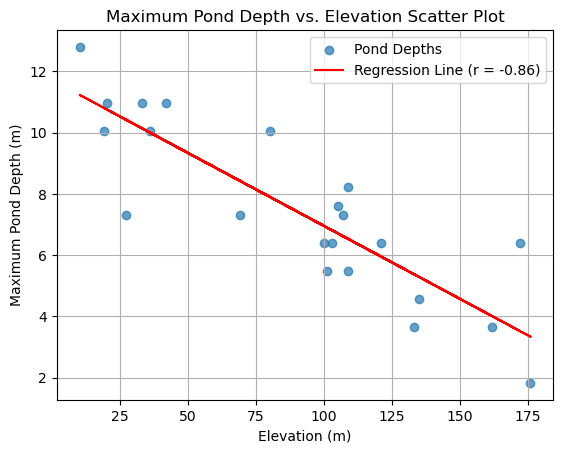

In [8]:
import rasterio
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Dropping rows with NaN values in Latitude/Longitude:
pond_data = pond_data.dropna(subset=['Latitude', 'Longitude'])

# Extracting latitude, longitude, and depth columns:
pond_coordinates = list(zip(pond_data['Latitude'], pond_data['Longitude']))
pond_depths = pond_data['Maximum Depth (m)']

# Getting elevation at pond locations:
def get_elevation_at_ponds(coordinates, dem_array, dem_transform):
    elevations = []
    for lat, lon in coordinates:
        row, col = dem.index(lon, lat)
        elevation = dem_array[row, col]
        elevations.append(elevation)
    return elevations
pond_elevations = get_elevation_at_ponds(pond_coordinates, dem_array, dem.transform)

# Correlation coefficient:
correlation = np.corrcoef(pond_elevations, pond_depths)[1, 0]
print(f"Correlation Coefficient: {correlation}")

# Regression line:
slope, intercept, r_value, p_value, std_err = linregress(pond_elevations, pond_depths)
line = slope * np.array(pond_elevations) + intercept

# Scatter plot:
plt.scatter(pond_elevations, pond_depths, label='Pond Depths', alpha=0.7)
plt.plot(pond_elevations, line, color='red', label=f'Regression Line (r = {r_value:.2f})')
plt.xlabel('Elevation (m)')
plt.ylabel('Maximum Pond Depth (m)')
plt.title('Maximum Pond Depth vs. Elevation Scatter Plot')
plt.legend()
plt.grid(True)
plt.savefig('Scatter_plot_pond.png', dpi=300, bbox_inches='tight')
plt.show()

**Correlation Coefficient:** -0.86.

It implies a strong inverse relationship between pond depth and elevation. Consequently, as elevation rises, pond depth tends to decrease.